In [1]:
# -*- coding: utf-8 -*-
"""
PESCADATA Fish Acoustics: Preliminary Descriptive Data Analysis
Created on Tue Sep 17 08:44:33 2024

@author: jmanitz
"""

'\nPESCADATA Fish Acoustics: Preliminary Descriptive Data Analysis\nCreated on Tue Sep 17 08:44:33 2024\n\n@author: jmanitz\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
path = "/Users/navne/OneDrive/Desktop/Jule/Documents/climate_projects/ocean_capstone/acoustics_data_2020.csv"
dt = pd.read_csv(path, skipinitialspace=True, delimiter=";")#, header=0, )
dt.columns

C:\Users\navne\AppData\Local\Temp\ipykernel_39580\3659741049.py:3: DtypeWarning: Columns (91) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv(path, skipinitialspace=True, delimiter=";")#, header=0, )


Index(['Barco', 'Viaje', 'Region_ID', 'Region_name', 'Region_class',
       'Process_ID', 'Sv_mean', 'NASC', 'Sv_max', 'Sv_min',
       ...
       'Exclude_below_line_depth_max', 'Exclude_below_line_range_max',
       'Samples_Below_Bottom_Exclusion', 'Samples_Above_Surface_Exclusion',
       'Samples_In_Domain', 'Bad_data_empty_water_samples', 'Heave_source',
       'Heave_min', 'Heave_max', 'Heave_mean'],
      dtype='object', length=105)

In [4]:
# Check for relevant variables in the data set; possible response variable
dt[["Region_ID", "Region_class", "Species_name","Species_percent","Species_TS"]].astype('category').describe()

,Region_ID,Region_class,Species_name,Species_percent,Species_TS
count,27392,27392,27392,27392,27392
unique,5600,15,1,1,1
top,86,ANC,Unassigned,100,-40
freq,23,13763,27392,27392,27392


<Axes: title={'center': 'Frequency of Region_class'}, xlabel='Count', ylabel='Region_class'>

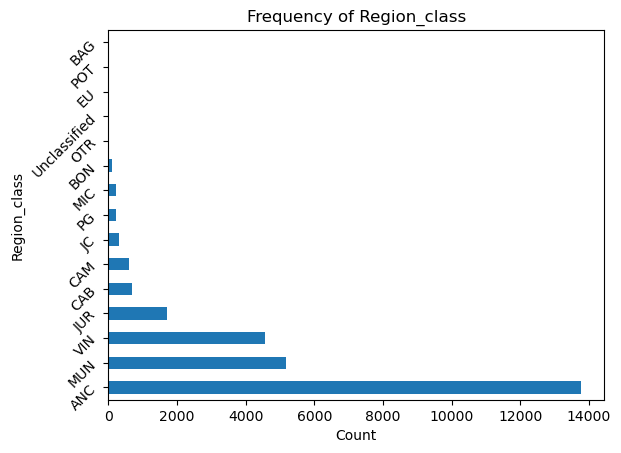

In [5]:
# Visualize Frequency of Region_class
dt["Region_class"].value_counts().plot(kind='barh',  rot=45, 
                                      ylabel='Region_class', xlabel='Count', title ="Frequency of Region_class")

In [6]:
# Frequency of Region_class
dt["Region_class"].value_counts()

Region_class
ANC             13763
MUN              5184
VIN              4567
JUR              1716
CAB               678
CAM               593
JC                322
PG                230
MIC               208
BON               103
OTR                10
Unclassified        8
EU                  6
POT                 2
BAG                 2
Name: count, dtype: int64

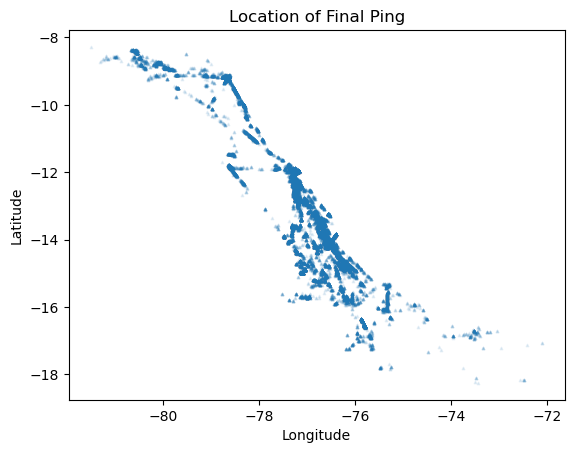

In [7]:
# Plot location at the final ping ('Lat_E', 'Lon_E')
plt.scatter(x=dt['Lon_E'], y=dt['Lat_E'], s=3, marker="^", alpha=0.1)
plt.xlabel ('Longitude')
plt.ylabel ('Latitude')
plt.title ('Location of Final Ping')
plt.show()

In [8]:
# Most important predictors
dt[["Height_mean", "Depth_mean", "Sv_mean", "NASC", "Sv_max", "Sv_min", "Sv_noise"]].describe()


,Height_mean,Depth_mean,Sv_mean,NASC,Sv_max,Sv_min,Sv_noise
count,27392.000000,27392.000000,27392.000000,2.739200e+04,27392.000000,27392.000000,27392.000000
mean,1.611526,34.877970,-160.970967,4.095618e+03,-151.590879,-167.704261,-980.418479
std,2.417622,55.066196,297.059548,1.042351e+05,300.393569,294.553784,10.650949
min,0.002306,0.725327,-999.000000,0.000000e+00,-999.000000,-999.000000,-1006.124041
25%,0.494609,7.498035,-65.007585,9.705766e+00,-55.219006,-64.988363,-986.730548
50%,0.787972,12.852724,-56.805446,7.819750e+01,-47.611876,-64.817348,-980.091839
75%,1.644000,27.789329,-50.498772,3.707061e+02,-40.971255,-63.641564,-973.618896
max,43.515127,315.094719,-7.530407,1.662787e+07,-0.253201,-42.212651,-941.014280


array([[<Axes: xlabel='Height_mean', ylabel='Height_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Height_mean'>,
        <Axes: xlabel='NASC', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_max', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_min', ylabel='Height_mean'>,
        <Axes: xlabel='Sv_noise', ylabel='Height_mean'>],
       [<Axes: xlabel='Height_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Depth_mean'>,
        <Axes: xlabel='NASC', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_max', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_min', ylabel='Depth_mean'>,
        <Axes: xlabel='Sv_noise', ylabel='Depth_mean'>],
       [<Axes: xlabel='Height_mean', ylabel='Sv_mean'>,
        <Axes: xlabel='Depth_mean', ylabel='Sv_mean'>,
        <Axes: xlabel='Sv_mean', ylabel='Sv_mean'>,
        <Axes: xlabel='NASC', ylabel='Sv_mean'>,
   

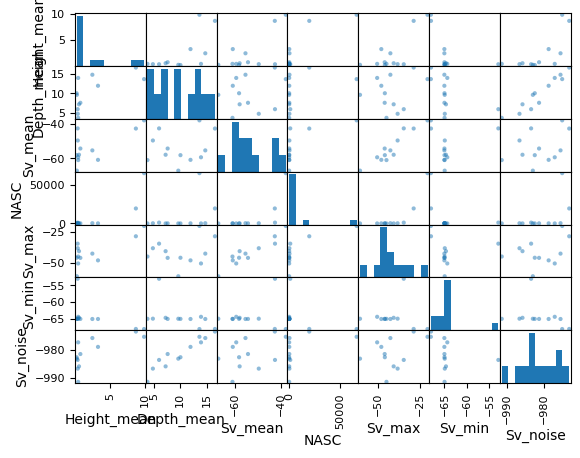

In [9]:
# Plot predictors of interest
dt3 = dt.loc[lambda dt: dt['Region_ID'] == 3] # Subset data for exploration purposes
pd.plotting.scatter_matrix(dt3[["Height_mean", "Depth_mean", "Sv_mean", "NASC", "Sv_max", "Sv_min", "Sv_noise"]])

Text(0.5, 1.0, 'Average Shoal Height and Depth')

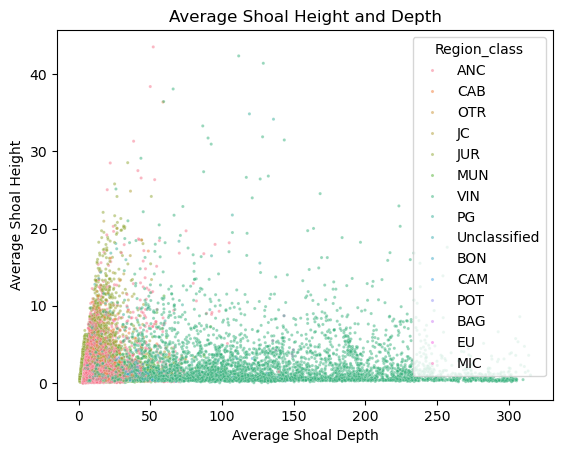

In [10]:
# Average Shoal Height and Depth 
sns.scatterplot(dt, y="Height_mean", x="Depth_mean", hue="Region_class", alpha=0.5, s=5)
plt.ylabel ('Average Shoal Height')
plt.xlabel ('Average Shoal Depth')
plt.title ('Average Shoal Height and Depth')

In [11]:
# Backscatter volume mean strength vs Nautical acoustic dispersion coefficient
#sns.scatterplot(dt, x="Sv_mean", y="NASC", alpha=0.5)# hue="Region_class",
#plt.ylabel ('Nautical acoustic dispersion coefficient')
#plt.xlabel ('Backscatter volume mean strength')

<Axes: xlabel='Height_mean', ylabel='Region_class'>

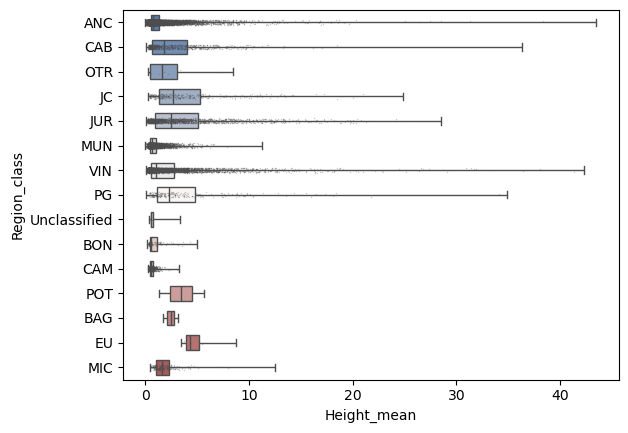

In [12]:
sns.boxplot(data=dt, x="Height_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6)
sns.stripplot(dt, x="Height_mean", y="Region_class", size=1, color=".3", alpha=0.3)

<Axes: xlabel='Depth_mean', ylabel='Region_class'>

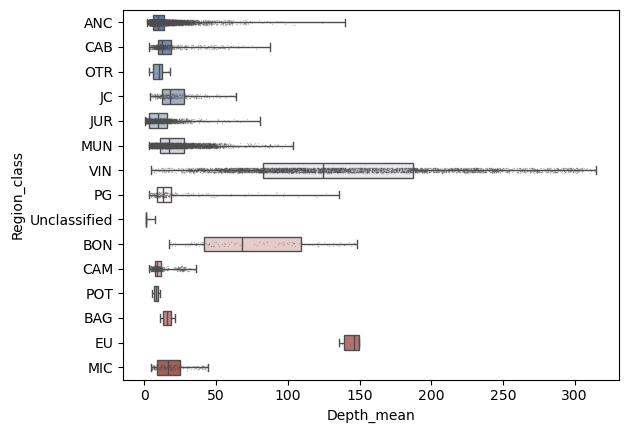

In [13]:
sns.boxplot(data=dt, x="Depth_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6)
sns.stripplot(dt, x="Depth_mean", y="Region_class", size=1, color=".3", alpha=0.3)

<Axes: xlabel='Sv_mean', ylabel='Region_class'>

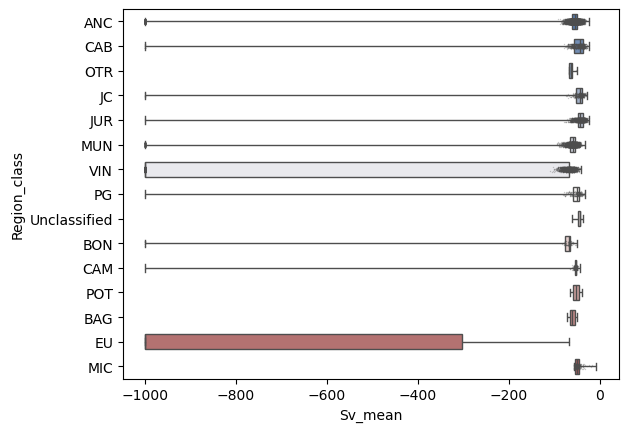

In [14]:
sns.boxplot(data=dt, x="Sv_mean", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6)
sns.stripplot(dt, x="Sv_mean", y="Region_class", size=1, color=".3", alpha=0.3)

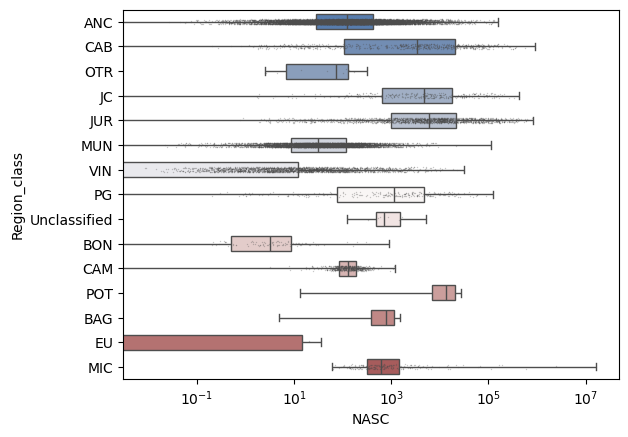

In [15]:
sns.boxplot(data=dt, x="NASC", y="Region_class", hue="Region_class", whis=[0, 100], palette="vlag", width=.6)
sns.stripplot(dt, x="NASC", y="Region_class", size=1, color=".3", alpha=0.3)
plt.xscale("log")

In [16]:
# Plot in terms of time of recording

